Posture Detection Code

In [ ]:
!pip install mediapipe opencv-python

In [1]:
import mediapipe as mp
import cv2
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
data = np.array([])
recording = False

In [3]:
def calculate_angle(a, b, c):
    shoulder_elbow = np.array([a.x - b.x, b.y - a.y])
    elbow_wrist = np.array([b.x - c.x, c.y - b.y])
    theta_rad = np.arccos(shoulder_elbow.dot(elbow_wrist)/(np.linalg.norm(shoulder_elbow)*np.linalg.norm(elbow_wrist)))
    theta_degrees = 180 - np.rad2deg(theta_rad)
    return theta_degrees

In [4]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if recording:
            data = np.append(data, [calculate_angle(results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER],
                              results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_ELBOW],
                              results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_WRIST])], axis = 0)        
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color = (255, 0, 0),
                                                                                                                      thickness = 2,
                                                                                                                      circle_radius = 1))
        cv2.imshow("Pose Detector", image)
        if cv2.waitKey(10) & 0xFF == ord(" "):
            if not recording:
                recording = True
            else:
                break

cap.release()
cv2.destroyAllWindows()

In [5]:
import matplotlib.pyplot as plt

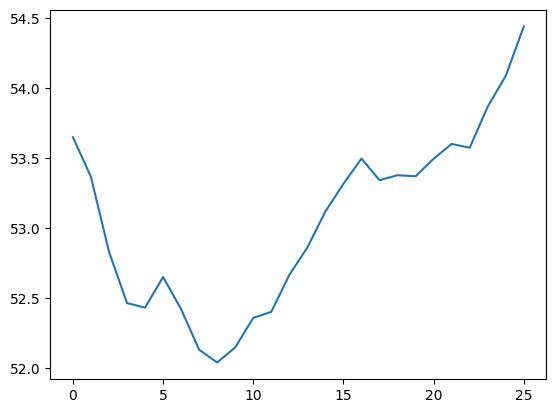

In [6]:
figure, ax = plt.subplots()
ax.plot(data)
plt.show()